<a href="https://colab.research.google.com/github/Manas1820/Confluence-ServerSide/blob/master/Ranking-Algo/RankingSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Logic For Ranking System**

Using the module -> [scikit-criteria](https://scikit-criteria.readthedocs.io/en/latest/)

In [ ]:
!pip install scikit-criteria

In [2]:
# import
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import minmax_scale
%matplotlib inline
from skcriteria import Data, MIN, MAX

In [7]:
users_data = pd.read_csv("rating.csv")
users_data = users_data.loc[:, ['ID', 'skills_score', 'work_experience', 'rating', 'origin']]
users_data.head(10)

,ID,skills_score,work_experience,rating,origin
0,1,18.0,8,307.0,1
1,2,15.0,8,350.0,1
2,3,18.0,8,318.0,1
3,4,16.0,8,304.0,1
4,5,17.0,8,302.0,0
5,6,15.0,8,429.0,1
6,7,14.0,8,454.0,1
7,8,14.0,8,440.0,1
8,9,14.0,8,455.0,1
9,10,15.0,8,390.0,1


In [22]:
criteria_data = Data(
    users_data.iloc[:, 1:],           # the pandas dataframe
    [MAX, MAX, MAX,MIN],              # direction of goodness for each column
    anames = users_data['ID'],        # each entity's name, here  userId
    cnames = users_data.columns[1:],  # attribute/column name
    # weights=[1,1,1,1,1]             # weights for each attribute (optional)
    )
criteria_data

ALT./CRIT.,skills_score (max),work_experience (max),rating (max),origin (min)
1,18,8,307,1
2,15,8,350,1
3,18,8,318,1
4,16,8,304,1
5,17,8,302,0
6,15,8,429,1
7,14,8,454,1
8,14,8,440,1
9,14,8,455,1
10,15,8,390,1


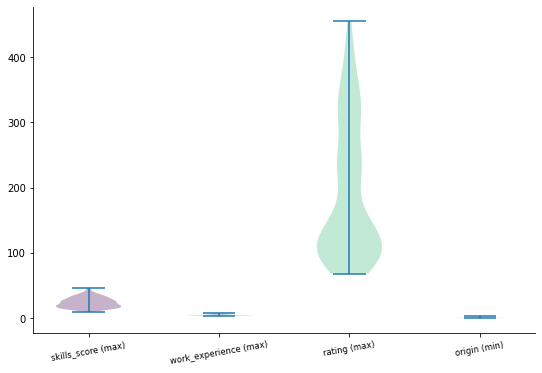

In [23]:
# some visualization -- diverse distribution and unit
criteria_data.plot("violin")

In [31]:
def normalize_data(logic="minmax"):
  df = users_data.iloc[:, 1:].values.copy()
  if logic == "minmax":
    normalized_data = minmax_scale(df)
    normalized_data[:, 2] = 1 - normalized_data[:, 2]
    normalized_data[:, 3] = 1 - normalized_data[:, 3]
  elif logic == "sumNorm":
    normalized_data = df / df.sum(axis=0)
    normalized_data[:, 2] = 1 / normalized_data[:, 2]
    normalized_data[:, 3] = 1 / normalized_data[:, 3]
  elif logic == "maxNorm":
    normalized_data = df / df.max(axis=0)
    normalized_data[:, 2] = 1 / normalized_data[:, 2]
    normalized_data[:, 3] = 1 / normalized_data[:, 3]
  return normalized_data


In [33]:
def plot_heatmap(logic="minmax"):
  plot_data = normalize_data(logic)
  user_model_names = users_data['ID']
  attribute_names = users_data.columns[1:]
  sns.heatmap(plot_data, annot=True, yticklabels = user_model_names, xticklabels = attribute_names, fmt='.3g')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


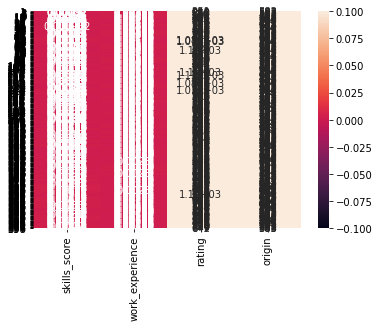

In [35]:
plot_heatmap("sumNorm")

In [37]:
from skcriteria.madm import simple
# weighted sum
dm = simple.WeightedSum(mnorm="sum")
dec = dm.decide(criteria_data)
dec

/usr/local/lib/python3.7/dist-packages/skcriteria/norm.py:579: RuntimeWarning: divide by zero encountered in true_divide
  mincrits_inverted = 1.0 / arr[:, mincrits]


ALT./CRIT.,skills_score (max),work_experience (max),rating (max),origin (min),Rank
1,18,8,307,1,87
2,15,8,350,1,64
3,18,8,318,1,74
4,16,8,304,1,102
5,17,8,302,0,1
6,15,8,429,1,36
7,14,8,454,1,33
8,14,8,440,1,35
9,14,8,455,1,32
10,15,8,390,1,48
